#### Copyright (C) Kevin Costa Scaccia - All Rights Reserved
##### Written by Kevin Scaccia <kevin_developer@outlook.com>, Nov 2019

## Simple SON Network
### The Kohonen self-organizing map is a variation of the competitive learning paradigm in with a 2-dimensional structure is imposet on neurons


## Imports

In [0]:
import numpy as np  # matrix math
import matplotlib.pyplot as plt  # plot library
import matplotlib.patches as mpatches  # legend on plot
import pandas as pd  # load dataset
from sklearn import datasets  # example dataset
plt.style.use('ggplot') # plot style

## SON Network Class

In [0]:
class NeuronSON():
    #
    # Constructor
    #
    def __init__(self, feature_size):
        self.feature_size = feature_size
        self.weights = np.random.random((feature_size))
    #
    # Similarity Function (euclidian distance)
    #
    def distance(self, data):
        return (  (self.weights[0]-data[0])**2 + (self.weights[1]-data[1])**2 )**(1/2)
    
    def neighbor_distance(self, unity):
        return (  (self.weights[0]-unity.weights[0])**2 + (self.weights[1]-unity.weights[1])**2 )**(1/2)

#
#
#
class SON_Network():
    #
    # Constructor
    #1
    def __init__(self, grid_size, data, feature_size):
        self.data = np.array(data)
        self.grid = np.zeros((grid_size, grid_size), dtype=NeuronSON)
        self.grid_size = grid_size
        for i in range(grid_size):
            for j in range(grid_size):
                self.grid[i][j] = NeuronSON(feature_size)
    #
    # Plot Winner neighborhood HeatMAP
    #
    def plot_neighborhood(self, grid_distances):
        plt.figure(figsize=(4, 4), dpi=80, facecolor='w');plt.grid(color='black', linestyle='-', linewidth=0.2)
        plt.title("Winner neighborhood")
        plt.imshow(grid_distances, cmap='hot', interpolation='nearest', )
        plt.show()
    #
    # Grid Distance (Assuming a 2D grid)
    #
    def grid_distance(self, unity, winner):
        manhattan_dist = abs(unity[0]-winner[0]) + abs(unity[1]-winner[1])
        # Small values of sigma reverts to winner-takes-all learning
        return np.e**( - ((manhattan_dist**2) / (2*(self.sigma**2)) ) )
    #
    #
    #
    def train(self, epochs, learning_rate=0.1, sigma=0.8):
        #
        self.sigma = sigma
        total_error = []
        #
        for i in range(epochs):
            total_distances = 0.0
            # for each example
            for example in self.data:
                ########## COMPATITIVE PHASE (find the winner)
                # distance matrix
                maxx = np.inf; i_winner = 0; j_winner = 0
                distances = np.zeros((self.grid_size, self.grid_size))
                # for each neuron  
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        distances[i][j] = self.grid[i][j].distance(example)
                        total_distances += distances[i][j] # all network error
                        if distances[i][j] < maxx: 
                            maxx = distances[i][j]
                            i_winner = i; j_winner = j
                #print("Winner [{}][{}]".format(i_winner, j_winner))
                ########## COOPERATIVE PHASE
                grid_distances = np.zeros((self.grid_size, self.grid_size))
                for i in range(self.grid_size):
                    for j in range(self.grid_size):
                        ########## ADAPTATION (LEARNING)
                        grid_distances[i][j] = self.grid_distance([i, j], [i_winner, j_winner])
                        # Update neighboor
                        w = self.grid[i][j].weights
                        delta_w = learning_rate*grid_distances[i][j]*(example - w)  # learning rule
                        w = w + delta_w 
                        self.grid[i, j].weights = w  # update 
                #self.plot_neighborhood(grid_distances) # Plot winner heatmap (neighborhood)
            total_error.append( np.mean(total_distances) )
        #
        #plt.title("DISTANCE LOSS")
        #plt.plot(total_error)
    #
    # Plot the 2D map 
    #
    def plot_map(self,):
        plt.figure(figsize=(5, 5), dpi=80, facecolor='w');plt.grid(color='black', linestyle='-', linewidth=0.2)
        plt.legend(handles=[mpatches.Patch(color='green', label='DATA'),
                            mpatches.Patch(color='red', label='NEURONS')])
   
        plt.title("DATA")
        plt.scatter(x=self.data[:,0], y=self.data[:,1], c='green')
        plt.axis([0, 1, 0, 1])
        x = []; y = []
        for unity in self.grid.reshape(-1):
            x.append(unity.weights[0])
            y.append(unity.weights[1])
        plt.scatter(x, y, c='red')
        plt.show()
    #
    # Plot the Unified Distance Matrix (U-matrix)
    #
    def plot_umatrix(self,):
            u_matrix = np.zeros((self.grid_size, self.grid_size))
            # for each neuron
            for i in range(self.grid_size):
                for j in range(self.grid_size):
                    # mean distance with neighbors
                    sum = 0.0
                    if i != 0: # add above distance
                        sum += self.grid[i][j].neighbor_distance(self.grid[i-1][j])
                    if i != self.grid_size-1: # add below distance
                        sum += self.grid[i][j].neighbor_distance(self.grid[i+1][j])
                    if j != 0: # add left distance
                        sum += self.grid[i][j].neighbor_distance(self.grid[i][j-1])
                    if j != self.grid_size-1: # add right distance
                        sum += self.grid[i][j].neighbor_distance(self.grid[i][j+1])
                    #
                    u_matrix[i][j] = sum/4
            plt.figure(figsize=(5, 5), dpi=80, facecolor='w');plt.grid(color='black', linestyle='-', linewidth=0.2)
            plt.imshow(u_matrix, interpolation='nearest',)
            plt.show()

## Test Generated Dataset 01

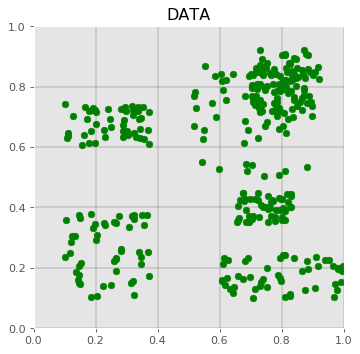

In [0]:
#@markdown ### Generate Data
#@markdown ##### Generate a simple dataset with 4 sparse clusters 
#
# Generating a Dataset
#
aux_a = np.random.rand(50,2)/4.5 + 0.7
aux_b = np.random.rand(50,2)/2.5 + 0.5
aux_c = np.random.rand(50,2)/5.5 + 0.7
aux_d = np.hstack([np.random.rand(50,1)/3.5 + 0.1, np.random.rand(50,1)/7 + 0.6])
aux_e = np.hstack([np.random.rand(50,1)/2.5 + 0.6, np.random.rand(50,1)/7 + 0.1])
aux_f = np.hstack([np.random.rand(50,1)/5.5 + 0.65, np.random.rand(50,1)/10 + 0.35])
aux_g = np.random.rand(50,2)/3.5 + 0.1
dataset = np.concatenate((aux_a, aux_b, aux_c, aux_d, aux_e, aux_f, aux_g))
#
# Plot
#
plt.figure(figsize=(5, 5), dpi=80, facecolor='w');plt.grid(color='black', linestyle='-', linewidth=0.2)
plt.title("DATA")
plt.scatter(x=dataset[:,0], y=dataset[:,1], c='green')
plt.axis([0, 1, 0, 1])
plt.show()



---------- Initial MAP ----------



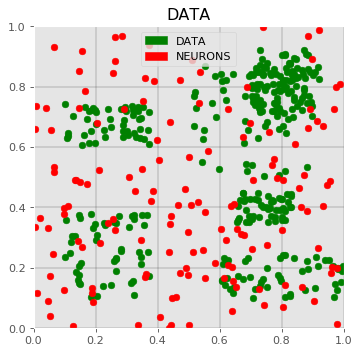



---------- 20 epochs MAP ----------



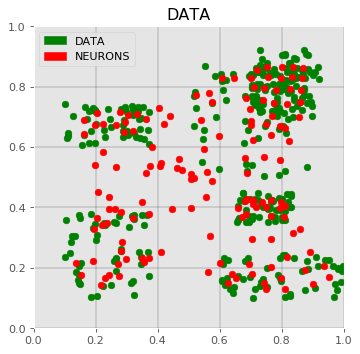



---------- U-Matrix ----------



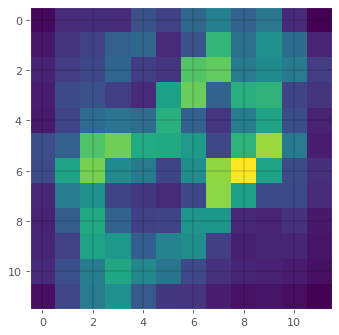

In [0]:
#@markdown #### 20 epochs train
#
# Define and Train SOM Network
#
my_network = SON_Network(grid_size=12, data=dataset, feature_size=2)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=20, learning_rate=0.1)
print("\n\n---------- 20 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



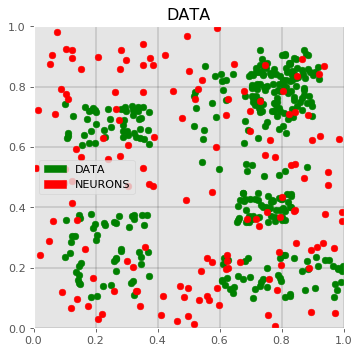



---------- 200 epochs MAP ----------



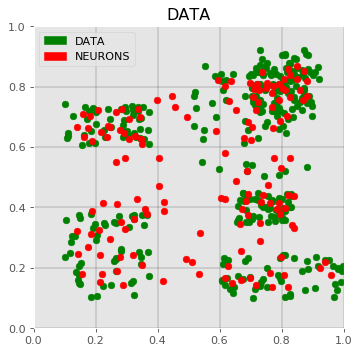



---------- U-Matrix ----------



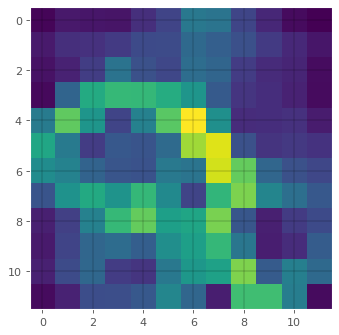

In [0]:
#@markdown #### 200 epochs train
#
# Define and Train SOM Network
#
my_network = SON_Network(grid_size=12, data=dataset, feature_size=2)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=200, learning_rate=0.1)
print("\n\n---------- 200 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



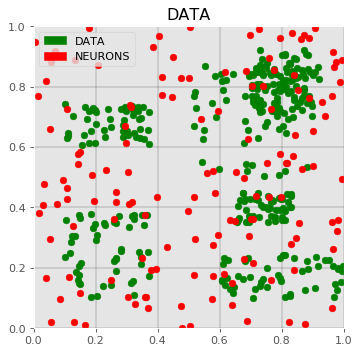



---------- 1000 epochs MAP ----------



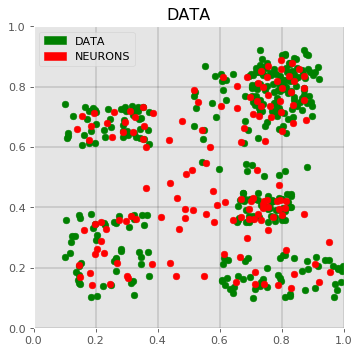



---------- U-Matrix ----------



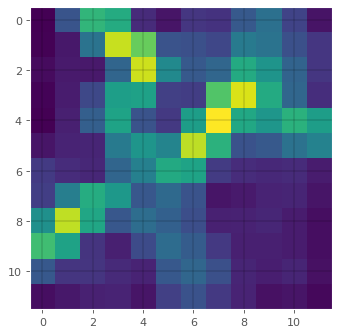

In [0]:
#@markdown #### 1000 epochs train
#
# Define and Train SOM Network
#
my_network = SON_Network(grid_size=12, data=dataset, feature_size=2)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=1000, learning_rate=0.1)
print("\n\n---------- 1000 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()

## Test in Iris Toy Dataset

In [0]:
#@markdown ### Data Load and Normalization
#
# Generating a Dataset
#
from sklearn.datasets import load_iris
iris_data = load_iris()
# Data Scale
for i in range(iris_data.data.shape[1]):
    maxx = np.max(iris_data.data[:,i])
    minn = np.min(iris_data.data[:,i])
    iris_data.data[:,i] = (iris_data.data[:,i] - minn) / (maxx - minn)
#
print('Data input shape:',iris_data.data.shape)
print('Data output shape:',iris_data.target.shape)

Data input shape: (150, 4)
Data output shape: (150,)




---------- Initial MAP ----------



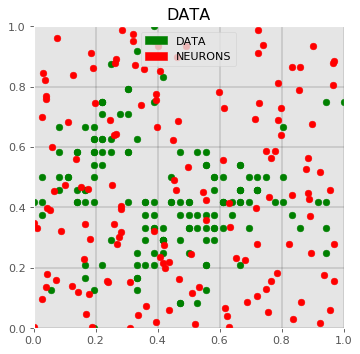



---------- 20 epochs MAP ----------



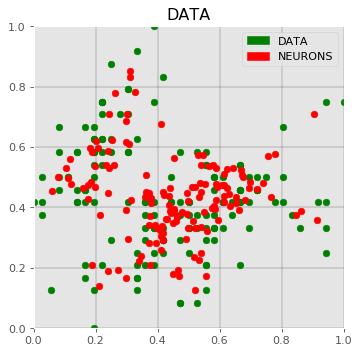



---------- U-Matrix ----------



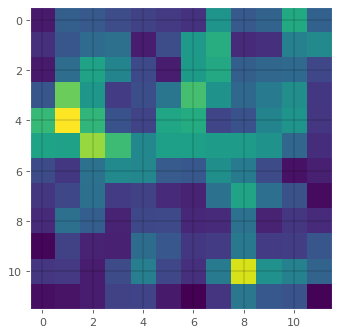

In [0]:
#@markdown #### 20 epochs train
#
# Define and Train SOM Network
#
feature_size = iris_data.data.shape[1]
my_network = SON_Network(grid_size=12, data=iris_data.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=20, learning_rate=0.1)
print("\n\n---------- 20 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



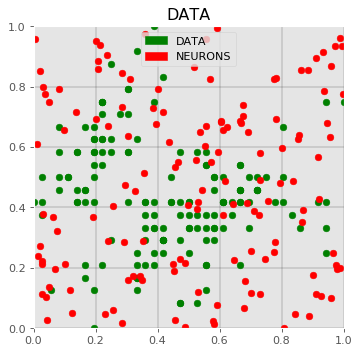



---------- 200 epochs MAP ----------



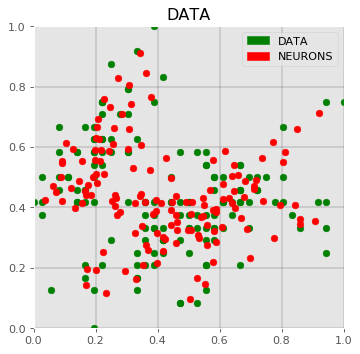



---------- U-Matrix ----------



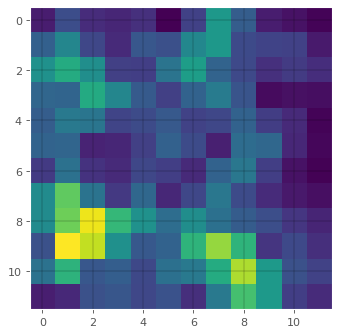

In [0]:
#@markdown #### 200 epochs train
#
# Define and Train SOM Network
#
feature_size = iris_data.data.shape[1]
my_network = SON_Network(grid_size=12, data=iris_data.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=200, learning_rate=0.1)
print("\n\n---------- 200 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



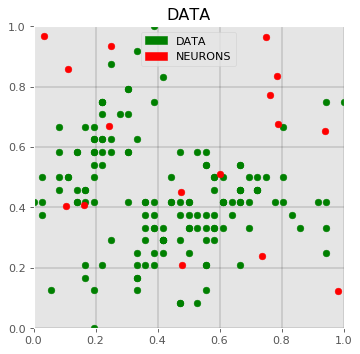



---------- 1000 epochs MAP ----------



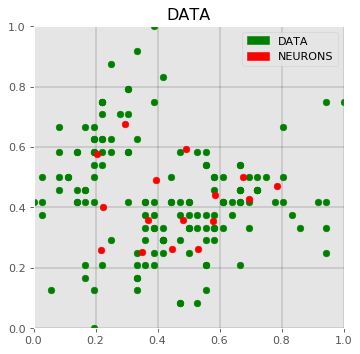



---------- U-Matrix ----------



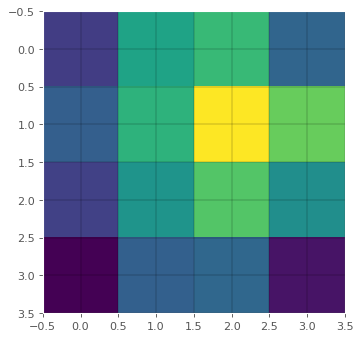

In [0]:
#@markdown #### 1000 epochs train - (4x4 grid)
#
# Define and Train SOM Network
#
feature_size = iris_data.data.shape[1]
my_network = SON_Network(grid_size=4, data=iris_data.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=1000, learning_rate=0.1)
print("\n\n---------- 1000 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()

## Test in Breast Cancer Dataset

In [0]:
#@markdown ### Data Load and Normalization
#
# Generating a Dataset
#
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
# Data Scale
for i in range(data_cancer.data.shape[1]):
    maxx = np.max(data_cancer.data[:,i])
    minn = np.min(data_cancer.data[:,i])
    data_cancer.data[:,i] = (data_cancer.data[:,i] - minn) / (maxx - minn)
#
print('Data input shape:', data_cancer.data.shape)
print('Data output shape:', data_cancer.target.shape)

Data input shape: (569, 30)
Data output shape: (569,)




---------- Initial MAP ----------



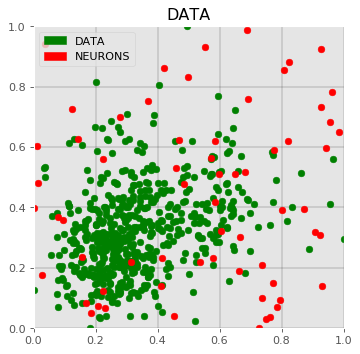



---------- 20 epochs MAP ----------



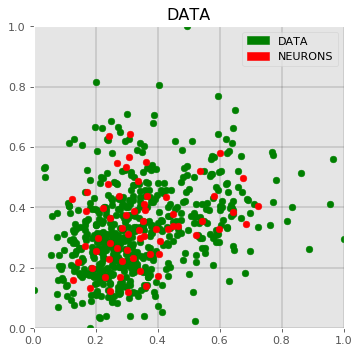



---------- U-Matrix ----------



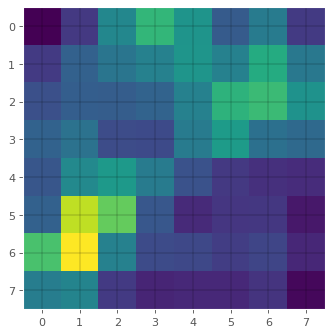

In [0]:
#@markdown #### 20 epochs train (8x8 - grid)
#
# Define and Train SOM Network
#
feature_size = data_cancer.data.shape[1]
my_network = SON_Network(grid_size=8, data=data_cancer.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=20, learning_rate=0.1)
print("\n\n---------- 20 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



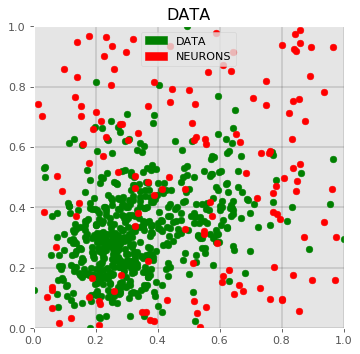



---------- 100 epochs MAP ----------



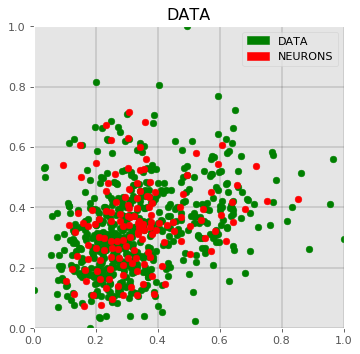



---------- U-Matrix ----------



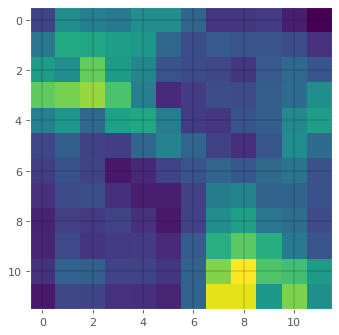

In [0]:
#@markdown #### 100 epochs train (12x12 - grid)
#
# Define and Train SOM Network
#
feature_size = data_cancer.data.shape[1]
my_network = SON_Network(grid_size=12, data=data_cancer.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=100, learning_rate=0.1)
print("\n\n---------- 100 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()



---------- Initial MAP ----------



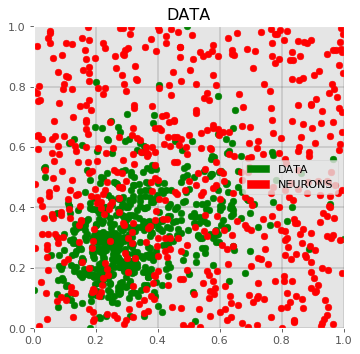



---------- 100 epochs MAP ----------



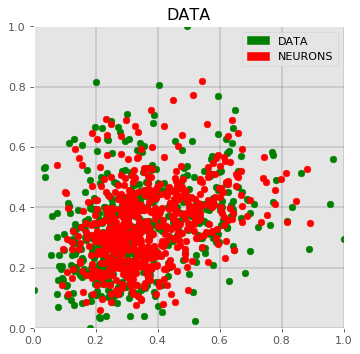



---------- U-Matrix ----------



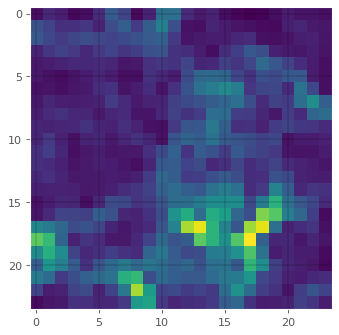

In [0]:
#@markdown #### 100 epochs train (24x24 - grid)
#
# Define and Train SOM Network
#
feature_size = data_cancer.data.shape[1]
my_network = SON_Network(grid_size=24, data=data_cancer.data, feature_size=feature_size)
#
print("\n\n---------- Initial MAP ----------\n")
my_network.plot_map()
my_network.train(epochs=100, learning_rate=0.1)
print("\n\n---------- 100 epochs MAP ----------\n")
my_network.plot_map()
print("\n\n---------- U-Matrix ----------\n")
my_network.plot_umatrix()